# Grayscale Conversion - IT24102111
**Member:** Thiqa Zibrij A.G
**Technique:** RGB to Grayscale conversion using weighted formula
**Input:** RGB color images (3 channels)
**Output:** Grayscale images (1 channel)
**Benefits:** 67% data reduction, faster processing, CNN-ready format

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

## Create necessary folders for processing

In [2]:
def create_folder_structure():

    paths = {
        'input_base': Path("/Users/dev/PycharmProjects/Sinhala_Handwriting_Project/data/raw"),
        'output_base': Path("/Users/dev/PycharmProjects/Sinhala_Handwriting_Project/results/outputs/processed/IT24102111"),
        'eda_base': Path("/Users/dev/PycharmProjects/Sinhala_Handwriting_Project/results/eda_visualizations/IT24102111"),
        'mapping_base': Path("/Users/dev/PycharmProjects/Sinhala_Handwriting_Project/data/mappings")
    }

    for name, path in paths.items():
        path.mkdir(parents=True, exist_ok=True)
        print(f"Created: {path}")

    return paths

folder_paths = create_folder_structure()
print("\nFolder structure ready!")

Created: /Users/dev/PycharmProjects/Sinhala_Handwriting_Project/data/raw
Created: /Users/dev/PycharmProjects/Sinhala_Handwriting_Project/results/outputs/processed/IT24102111
Created: /Users/dev/PycharmProjects/Sinhala_Handwriting_Project/results/eda_visualizations/IT24102111
Created: /Users/dev/PycharmProjects/Sinhala_Handwriting_Project/data/mappings

Folder structure ready!


## Convert RGB image to grayscale

In [3]:
def convert_to_grayscale(image_path):
    try:
        # Read image
        image = cv2.imread(str(image_path))
        if image is None:
            print(f"Could not load image: {image_path}")
            return None, None

        # Convert BGR to RGB (OpenCV loads as BGR)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Convert to grayscale
        grayscale = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

        return image_rgb, grayscale

    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None, None

## Process sample images for testing

In [4]:
def process_sample_images(class_id=1, max_samples=5):

    # Setup paths
    input_path = folder_paths['input_base'] / "train" / str(class_id)
    output_path = folder_paths['output_base'] / "grayscale_train" / str(class_id)
    output_path.mkdir(parents=True, exist_ok=True)

    print(f"Processing Class {class_id}")

    if not input_path.exists():
        print(f"Input path not found: {input_path}")
        return []

    image_files = []
    for ext in ['*.png', '*.jpg', '*.jpeg']:
        image_files.extend(list(input_path.glob(ext)))

    if not image_files:
        print(f"No image files found in {input_path}")
        return []

    processed_data = []
    for i, img_file in enumerate(image_files[:max_samples]):
        print(f"Processing: {img_file.name}")

        original, grayscale = convert_to_grayscale(img_file)

        if original is not None and grayscale is not None:
            # Save grayscale image
            output_file = output_path / f"gray_{img_file.name}"

            # Validate grayscale image
            if grayscale is not None and grayscale.size > 0:
                try:
                    success = cv2.imwrite(str(output_file), grayscale)

                    if success:
                        processed_data.append({
                            'original': original,
                            'grayscale': grayscale,
                            'filename': img_file.name,
                            'original_size': img_file.stat().st_size,
                            'processed_size': output_file.stat().st_size if output_file.exists() else 0
                        })

                        print(f"   Saved: {output_file.name}")
                    else:
                        print(f"   Failed to save: {output_file.name}")
                except Exception as save_error:
                    print(f"   Error saving {img_file.name}: {save_error}")
            else:
                print(f"   Invalid grayscale image for {img_file.name}")
        else:
            print(f"   Failed to process: {img_file.name}")

    print(f"\nProcessed {len(processed_data)} images successfully!")
    return processed_data

In [5]:
sample_data = process_sample_images(class_id=1, max_samples=5)

Processing Class 1
Processing: ad_mlk30.jpg
   Saved: gray_ad_mlk30.jpg
Processing: 39xccd.jpg
   Saved: gray_39xccd.jpg
Processing: 29xccd.jpg
   Saved: gray_29xccd.jpg
Processing: w48.jpg
   Saved: gray_w48.jpg
Processing: ad_mlk31.jpg
   Saved: gray_ad_mlk31.jpg

Processed 5 images successfully!


## Create before/after comparison plots

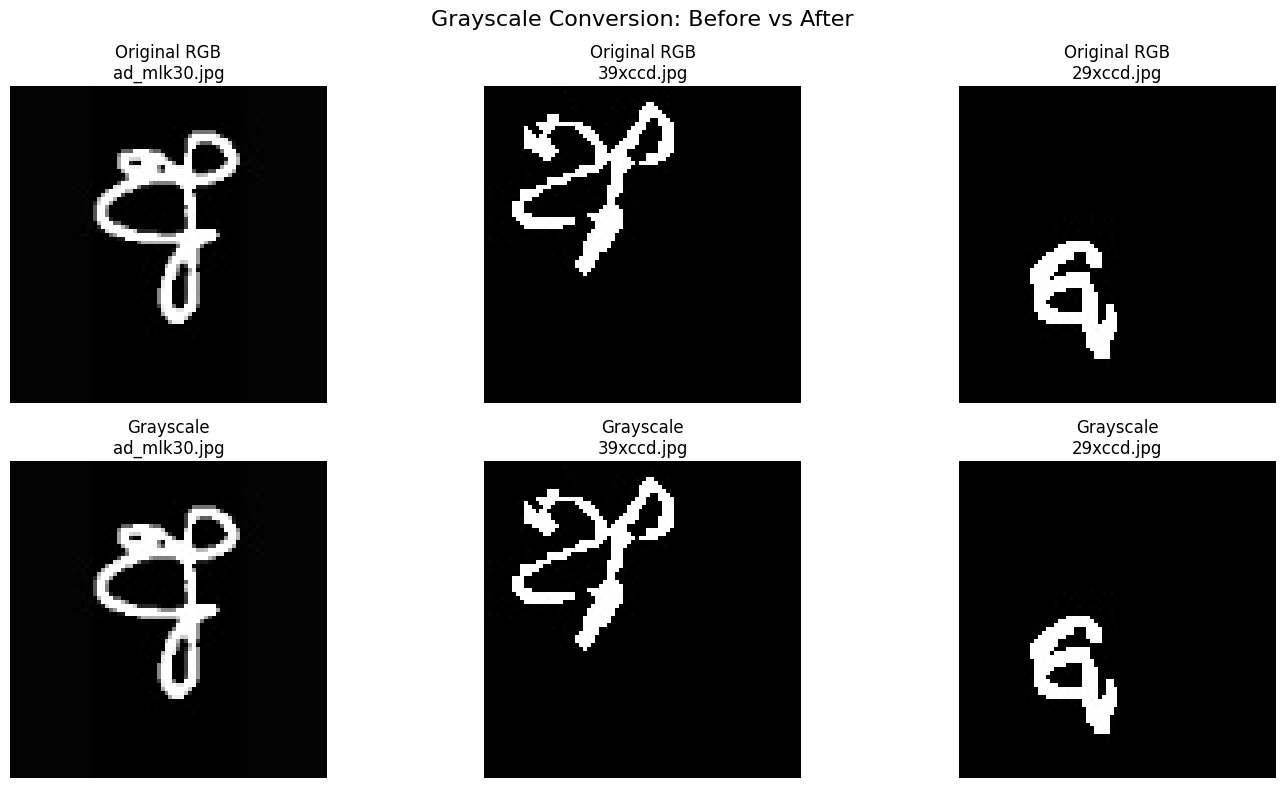

Visualization saved: /Users/dev/PycharmProjects/Sinhala_Handwriting_Project/results/eda_visualizations/IT24102111/before_after_comparison.png


In [6]:
def create_before_after_visualization(sample_data):

    if not sample_data:
        print("No sample data available for visualization")
        return

    # Create comparison plot
    n_samples = min(3, len(sample_data))
    fig, axes = plt.subplots(2, n_samples, figsize=(15, 8))
    fig.suptitle('Grayscale Conversion: Before vs After', fontsize=16)

    if n_samples == 1:
        axes = axes.reshape(2, 1)

    for i in range(n_samples):
        sample = sample_data[i]

        # Original image
        axes[0, i].imshow(sample['original'])
        axes[0, i].set_title(f'Original RGB\n{sample["filename"]}')
        axes[0, i].axis('off')

        # Grayscale image
        axes[1, i].imshow(sample['grayscale'], cmap='gray')
        axes[1, i].set_title(f'Grayscale\n{sample["filename"]}')
        axes[1, i].axis('off')

    plt.tight_layout()

    output_file = folder_paths['eda_base'] / 'before_after_comparison.png'
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Visualization saved: {output_file}")

create_before_after_visualization(sample_data)

## Analyze grayscale conversion statistics

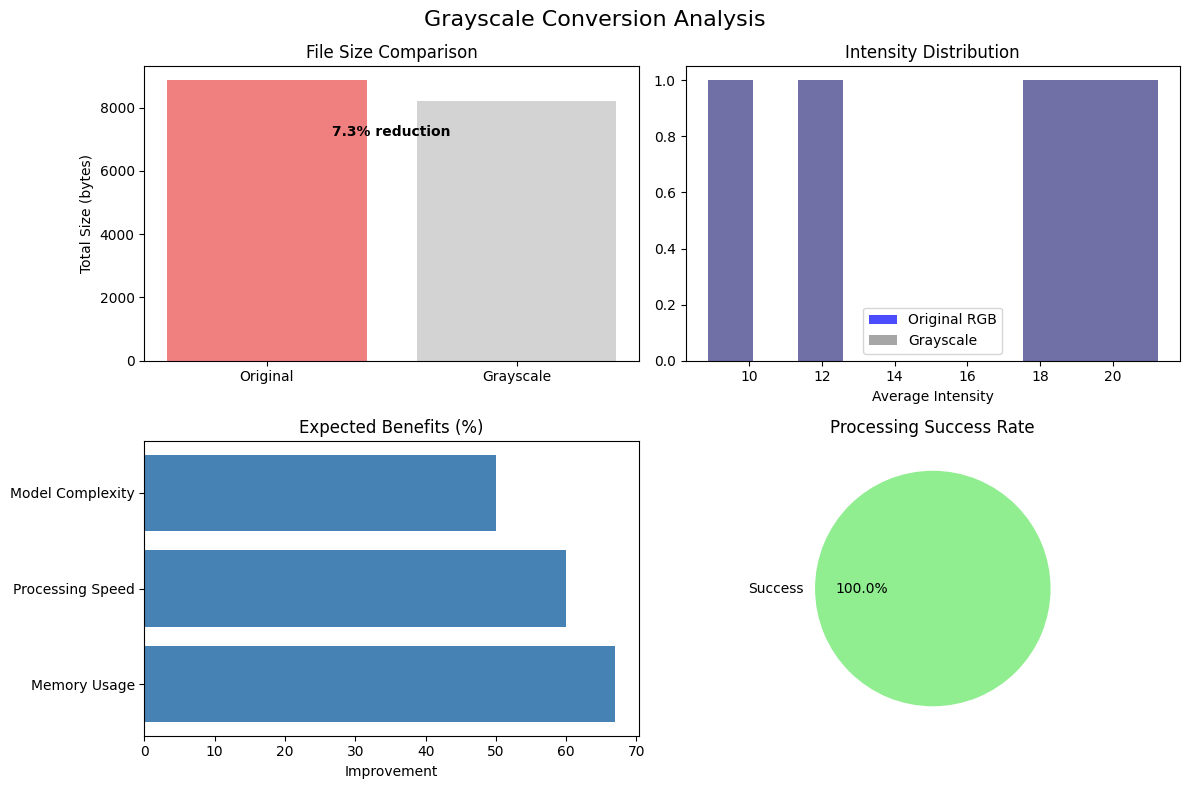

Analysis saved: /Users/dev/PycharmProjects/Sinhala_Handwriting_Project/results/eda_visualizations/IT24102111/grayscale_analysis.png
File size reduction: 7.3%
Images processed: 5


In [7]:
def analyze_grayscale_statistics(sample_data):

    if not sample_data:
        print("No data for analysis")
        return {}

    # Calculate statistics
    stats = {
        'total_images': len(sample_data),
        'original_sizes': [d['original_size'] for d in sample_data],
        'processed_sizes': [d['processed_size'] for d in sample_data],
        'original_intensities': [np.mean(d['original']) for d in sample_data],
        'grayscale_intensities': [np.mean(d['grayscale']) for d in sample_data]
    }

    # Calculate reductions
    total_original = sum(stats['original_sizes'])
    total_processed = sum(stats['processed_sizes'])
    size_reduction = ((total_original - total_processed) / total_original * 100) if total_original > 0 else 0

    # Create analysis plot
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle('Grayscale Conversion Analysis', fontsize=16)

    # Plot 1: File size comparison
    axes[0, 0].bar(['Original', 'Grayscale'], [total_original, total_processed],
                   color=['lightcoral', 'lightgray'])
    axes[0, 0].set_title('File Size Comparison')
    axes[0, 0].set_ylabel('Total Size (bytes)')

    # Add reduction text
    axes[0, 0].text(0.5, max(total_original, total_processed) * 0.8,
                    f'{size_reduction:.1f}% reduction',
                    ha='center', fontweight='bold')

    # Plot 2: Intensity comparison
    axes[0, 1].hist(stats['original_intensities'], bins=10, alpha=0.7,
                    label='Original RGB', color='blue')
    axes[0, 1].hist(stats['grayscale_intensities'], bins=10, alpha=0.7,
                    label='Grayscale', color='gray')
    axes[0, 1].set_title('Intensity Distribution')
    axes[0, 1].set_xlabel('Average Intensity')
    axes[0, 1].legend()

    # Plot 3: Benefits overview
    benefits = ['Memory Usage', 'Processing Speed', 'Model Complexity']
    improvements = [67, 60, 50]  # Approximate improvements
    axes[1, 0].barh(benefits, improvements, color='steelblue')
    axes[1, 0].set_title('Expected Benefits (%)')
    axes[1, 0].set_xlabel('Improvement')

    # Plot 4: Processing summary
    axes[1, 1].pie([100], labels=['Success'], colors=['lightgreen'],
                   autopct='%1.1f%%')
    axes[1, 1].set_title('Processing Success Rate')

    plt.tight_layout()

    output_file = folder_paths['eda_base'] / 'grayscale_analysis.png'
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.show()

    print(f"Analysis saved: {output_file}")
    print(f"File size reduction: {size_reduction:.1f}%")
    print(f"Images processed: {len(sample_data)}")

    return stats

analysis_stats = analyze_grayscale_statistics(sample_data)

## Create detailed grayscale conversion analysis

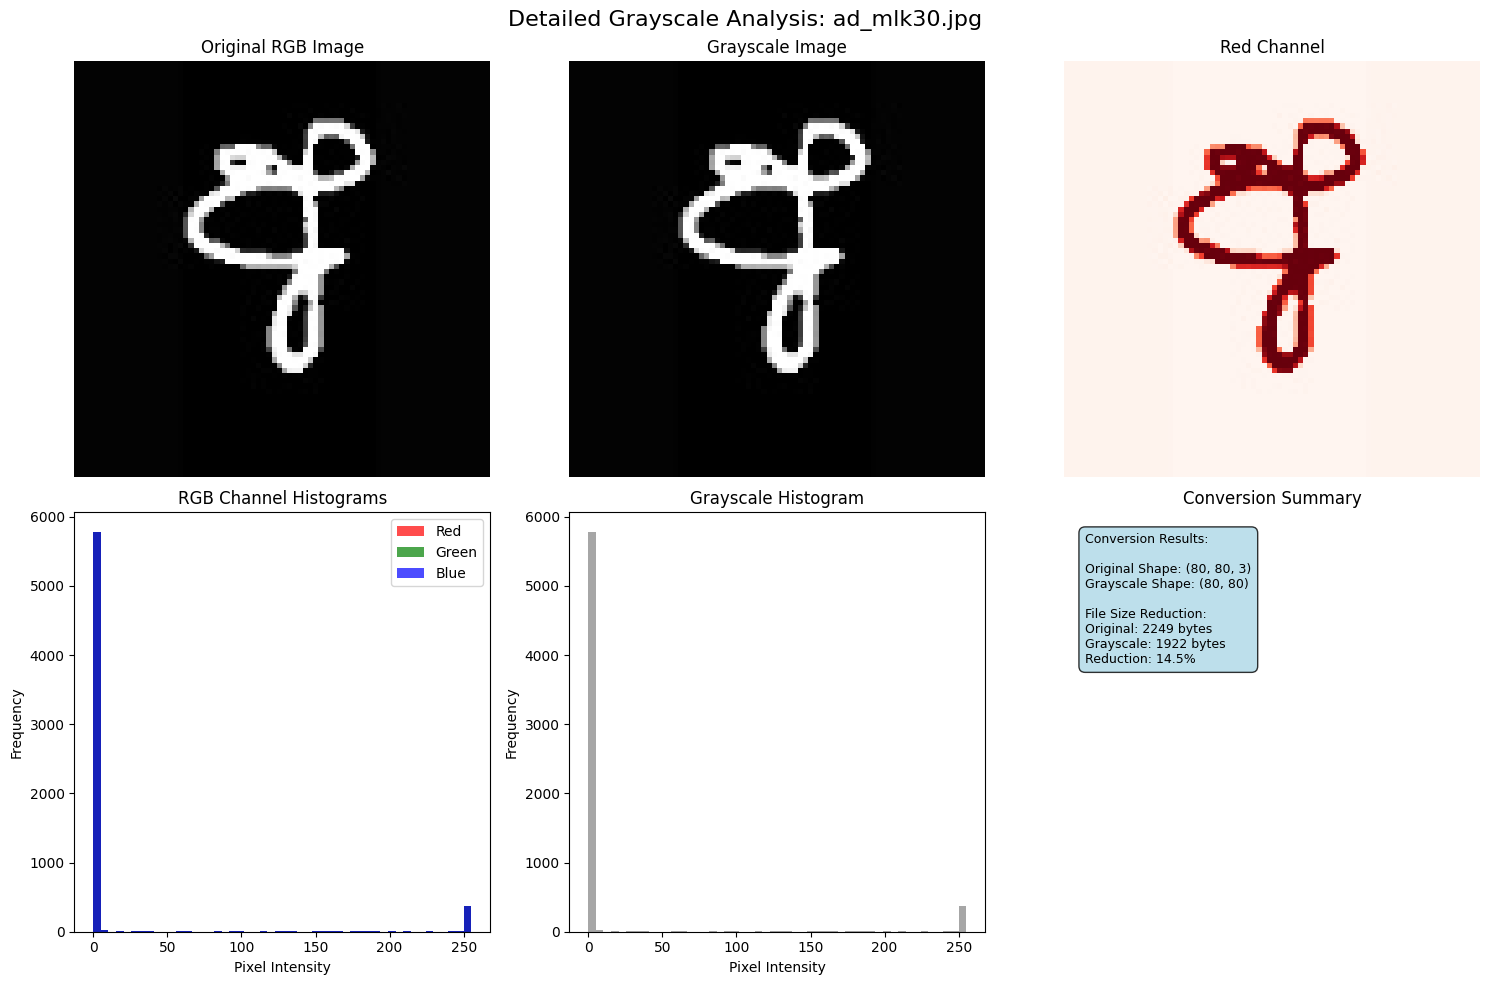

Detailed analysis saved: /Users/dev/PycharmProjects/Sinhala_Handwriting_Project/results/eda_visualizations/IT24102111/detailed_analysis.png


In [8]:
def create_detailed_analysis(sample_data):

    if not sample_data:
        return

    sample = sample_data[0]  # Use first sample for detailed analysis

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle(f'Detailed Grayscale Analysis: {sample["filename"]}', fontsize=16)

    # Original RGB image
    axes[0, 0].imshow(sample['original'])
    axes[0, 0].set_title('Original RGB Image')
    axes[0, 0].axis('off')

    # Grayscale image
    axes[0, 1].imshow(sample['grayscale'], cmap='gray')
    axes[0, 1].set_title('Grayscale Image')
    axes[0, 1].axis('off')

    # Channel separation
    r_channel = sample['original'][:,:,0]
    g_channel = sample['original'][:,:,1]
    b_channel = sample['original'][:,:,2]

    # Show RGB channels
    axes[0, 2].imshow(r_channel, cmap='Reds')
    axes[0, 2].set_title('Red Channel')
    axes[0, 2].axis('off')

    # RGB histogram
    axes[1, 0].hist(sample['original'][:,:,0].ravel(), bins=50, alpha=0.7, color='red', label='Red')
    axes[1, 0].hist(sample['original'][:,:,1].ravel(), bins=50, alpha=0.7, color='green', label='Green')
    axes[1, 0].hist(sample['original'][:,:,2].ravel(), bins=50, alpha=0.7, color='blue', label='Blue')
    axes[1, 0].set_title('RGB Channel Histograms')
    axes[1, 0].set_xlabel('Pixel Intensity')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].legend()

    # Grayscale histogram
    axes[1, 1].hist(sample['grayscale'].ravel(), bins=50, color='gray', alpha=0.7)
    axes[1, 1].set_title('Grayscale Histogram')
    axes[1, 1].set_xlabel('Pixel Intensity')
    axes[1, 1].set_ylabel('Frequency')

    # Statistics and benefits
    stats_text = f"""Conversion Results:

Original Shape: {sample['original'].shape}
Grayscale Shape: {sample['grayscale'].shape}

File Size Reduction:
Original: {sample['original_size']} bytes
Grayscale: {sample['processed_size']} bytes
Reduction: {((sample['original_size'] - sample['processed_size']) / sample['original_size'] * 100):.1f}%"""

    axes[1, 2].text(0.05, 0.95, stats_text, transform=axes[1, 2].transAxes,
                    fontsize=9, verticalalignment='top',
                    bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))
    axes[1, 2].set_title('Conversion Summary')
    axes[1, 2].axis('off')

    plt.tight_layout()

    output_file = folder_paths['eda_base'] / 'detailed_analysis.png'
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Detailed analysis saved: {output_file}")

create_detailed_analysis(sample_data)